# Technical Exploration 2 - Packet analysis

In [1]:
# Setup
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Get data
We're going to be analyzing packets from a pcap file from the [UNSW-NB15 dataset](https://research.unsw.edu.au/projects/unsw-nb15-dataset) using [scapy](https://scapy.net/). 
These papers go more in-depth about the dataset.
- Moustafa, Nour, and Jill Slay. "UNSW-NB15: a comprehensive data set for network intrusion detection
systems (UNSW-NB15 network data set)."Military Communications and Information Systems Conference
(MilCIS), 2015. IEEE, 2015.
- Moustafa, Nour, and Jill Slay. "The evaluation of Network Anomaly Detection Systems: Statistical analysis
of the UNSW-NB15 data set and the comparison with the KDD99 data set." Information Security Journal:
A Global Perspective (2016): 1-14.

In [2]:
from scapy.all import *
cap = scapy.utils.rdpcap("./UNSW-NB15/packets_small.pcap")

## Explore data

In [7]:
cap.show()
cap.conversations()

0000 CookedLinux / IP / TCP 59.166.0.3:intersys_cache > 149.171.126.0:6881 A
0001 CookedLinux / IP / TCP 59.166.0.3:intersys_cache > 149.171.126.0:6881 A
0002 CookedLinux / IP / TCP 149.171.126.0:6881 > 59.166.0.3:intersys_cache PA / Raw
0003 CookedLinux / IP / TCP 149.171.126.0:6881 > 59.166.0.3:intersys_cache PA / Raw
0004 CookedLinux / IP / TCP 59.166.0.3:intersys_cache > 149.171.126.0:6881 A
0005 CookedLinux / IP / TCP 59.166.0.3:intersys_cache > 149.171.126.0:6881 A
0006 CookedLinux / IP / TCP 59.166.0.3:intersys_cache > 149.171.126.0:6881 PA / Raw
0007 CookedLinux / IP / TCP 59.166.0.3:intersys_cache > 149.171.126.0:6881 PA / Raw
0008 CookedLinux / IP / TCP 149.171.126.0:6881 > 59.166.0.3:intersys_cache A
0009 CookedLinux / IP / TCP 149.171.126.0:6881 > 59.166.0.3:intersys_cache A
0010 CookedLinux / IP / TCP 149.171.126.0:6881 > 59.166.0.3:intersys_cache A / Raw
0011 CookedLinux / IP / TCP 149.171.126.0:6881 > 59.166.0.3:intersys_cache A / Raw
0012 CookedLinux / IP / TCP 149.171.

![Screenshot From 2024-11-21 11-04-37.png](<attachment:Screenshot From 2024-11-21 11-04-37.png>)
We can see the packets and the network topology
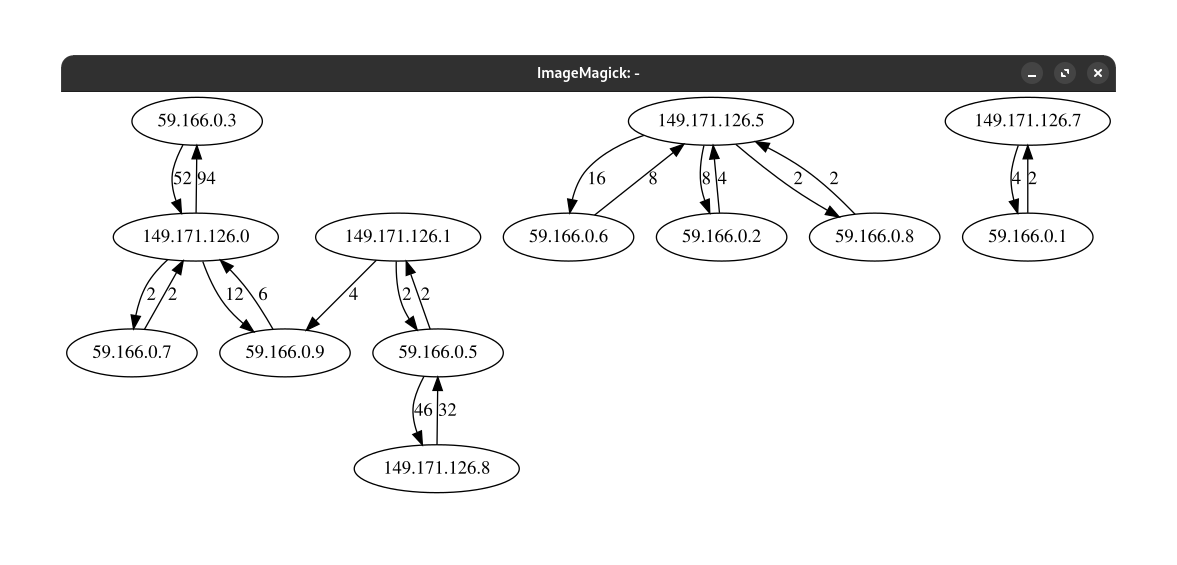

## Explore packets
Let's look at a single packet

In [4]:
cap[0]

<CookedLinux  pkttype=unicast lladdrtype=0x1 lladdrlen=6 src=b'\x02\x1a\xc5' proto=IPv4 |<IP  version=4 ihl=5 tos=0x0 len=52 id=26416 flags=DF frag=0 ttl=32 proto=tcp chksum=0xa43f src=59.166.0.3 dst=149.171.126.0 |<TCP  sport=intersys_cache dport=6881 seq=747668635 ack=751906714 dataofs=8 reserved=0 flags=A window=65160 chksum=0x64cf urgptr=0 options=[('NOP', None), ('NOP', None), ('Timestamp', (3222608264, 3222600241))] |>>>

We can see each layer's fields and values.

In [6]:
cap[0].pdfdump()


(evince:26892): Poppler-WARNING **: 11:47:32.413: unexpected tz val '5'


![Screenshot From 2024-11-21 11-47-51.png](<attachment:Screenshot From 2024-11-21 11-47-51.png>)

This is a diagram linking each hex value in the packet to the field it represents
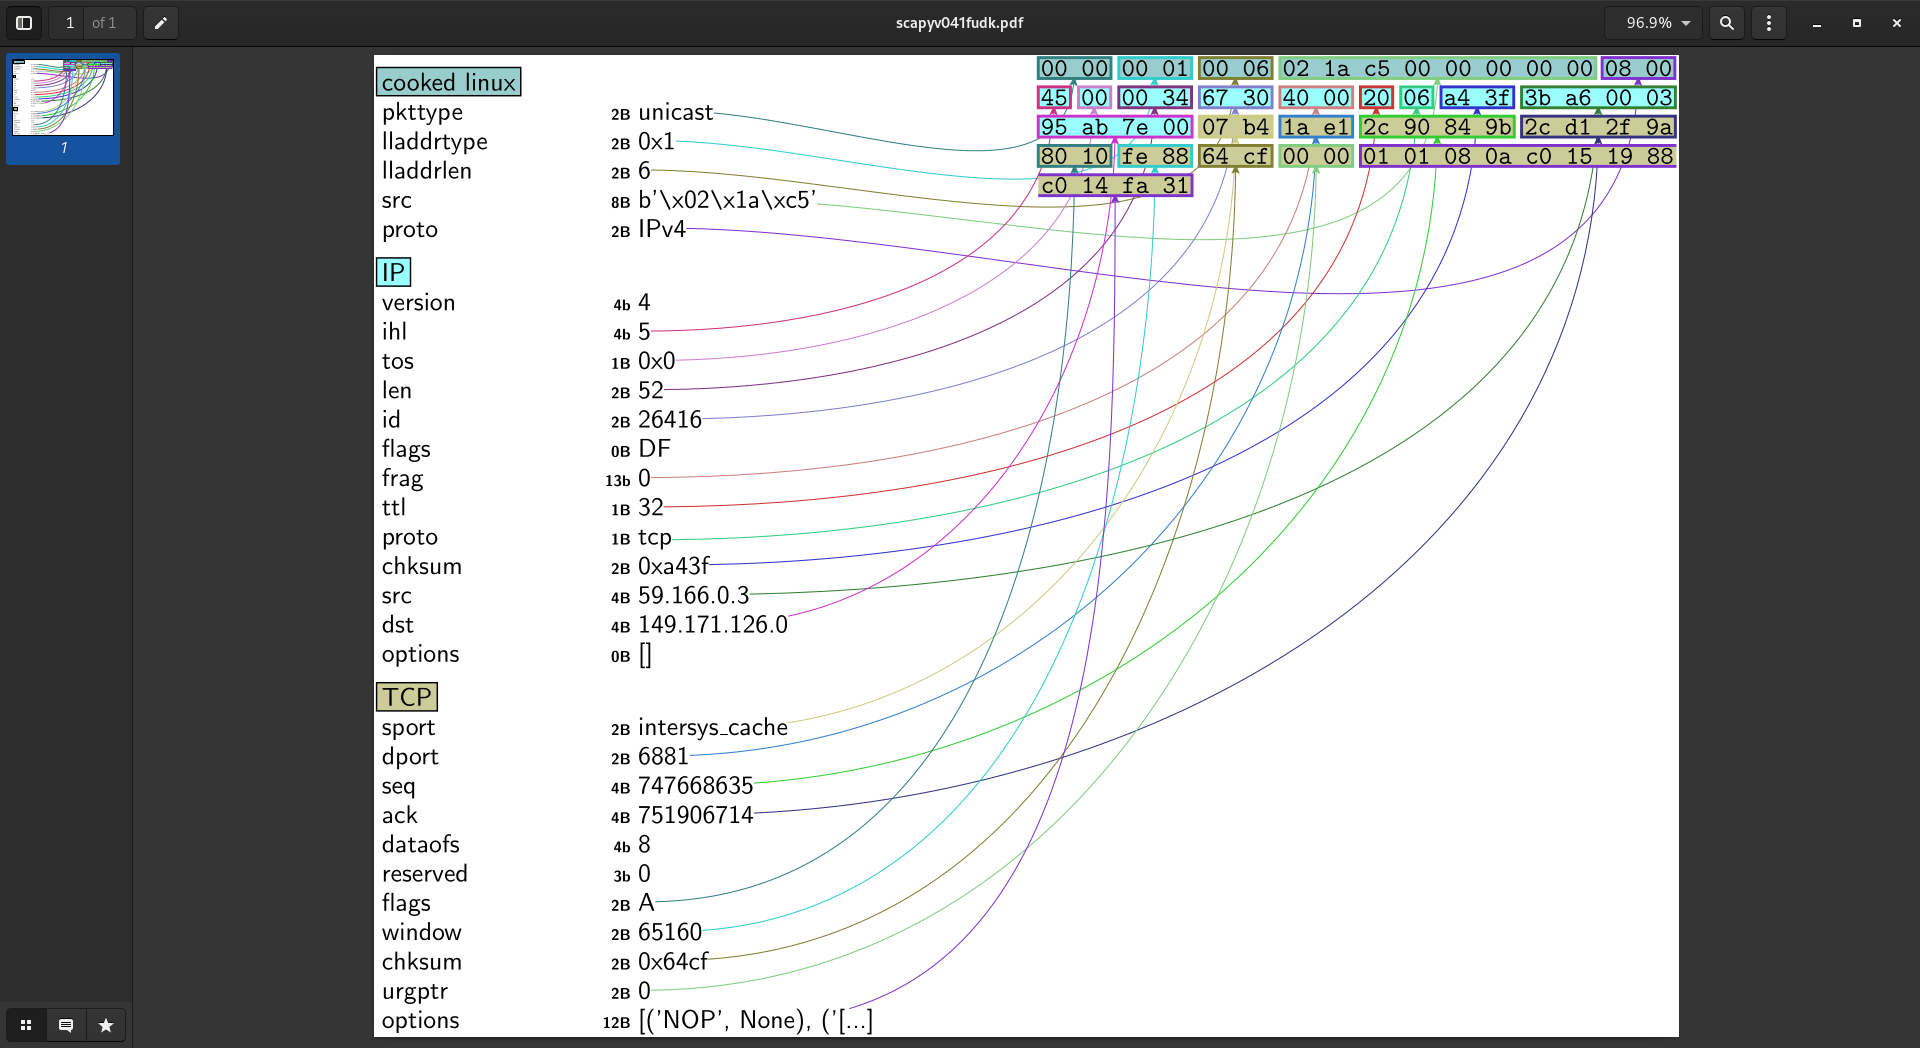

## Conclusion
We can take a quite detailed look at network traffic from within a notebook using this library 